In [25]:
#2-esfera
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [26]:
G=(lambda x,y,z,w: (x**2)+(y**2)+(z**2)+(w**2)-1)

In [27]:
def GetVectorF(G,r):
    
    v = G(r[0],r[1],r[2],r[3])
        
    return np.array([v])

In [28]:
def GetJacobian(G,r,h=1e-6):
    J = np.zeros((1,4))
    J[0,0] =(G(r[0]+h,r[1],r[2],r[3]) - G(r[0]-h,r[1],r[2],r[3]))/(2*h)
    J[0,1] =(  G(r[0],r[1]+h,r[2],r[3]) - G(r[0],r[1]-h,r[2],r[3]) )/(2*h)
    J[0,2] =(  G(r[0],r[1],r[2]+h,r[3]) - G(r[0],r[1],r[2]-h,r[3]) )/(2*h)  
    J[0,3] =(  G(r[0],r[1],r[2],r[3]+h) - G(r[0],r[1],r[2],r[3]-h) )/(2*h)  
    return np.transpose(J)

In [29]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return np.linalg.norm(v)

In [30]:
x=np.random.uniform(-1,1)
y=np.random.uniform(-1,1)
z=np.random.uniform(-1,1)
w=np.random.uniform(-1,1)
vector=np.array([x,y,z,w])
vector

array([-0.58086056,  0.28424998, -0.68517833, -0.24037082])

In [31]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
   
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF
        it += 1
        

    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r

In [33]:
#Para 1000 puntos
n=1000
X=np.random.uniform(-1,1,n)
Y=np.random.uniform(-1,1,n)
Z=np.random.uniform(-1,1,n)
W=np.random.uniform(-1,1,n)

resultados=np.zeros((1000,4))
for i in tqdm(range(n)):
    xsol= GetSolve(G,[X[i],Y[i],Z[i],W[i]])
    resultados[i][0]= xsol[0]
    resultados[i][1]=xsol[1]
    resultados[i][2]=xsol[2]
    resultados[i][3]=xsol[3]
    

100%|██████████| 1000/1000 [08:48<00:00,  1.89it/s]


In [34]:
print(np.count_nonzero(resultados))

4000


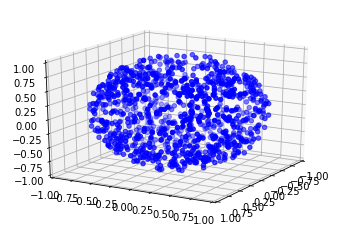

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

#configuración ejes
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

ax.view_init(20,30)

ax.scatter(resultados[:,0],resultados[:,1],resultados[:,2],resultados[:,3],color='b')